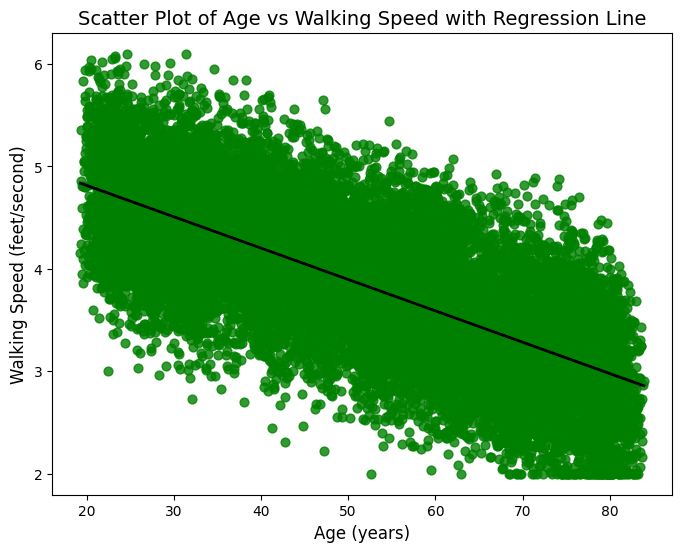

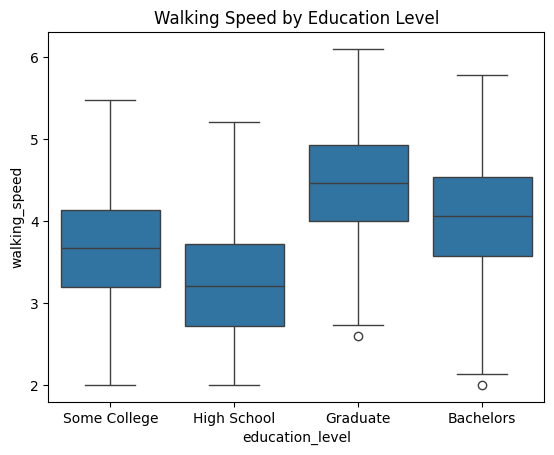

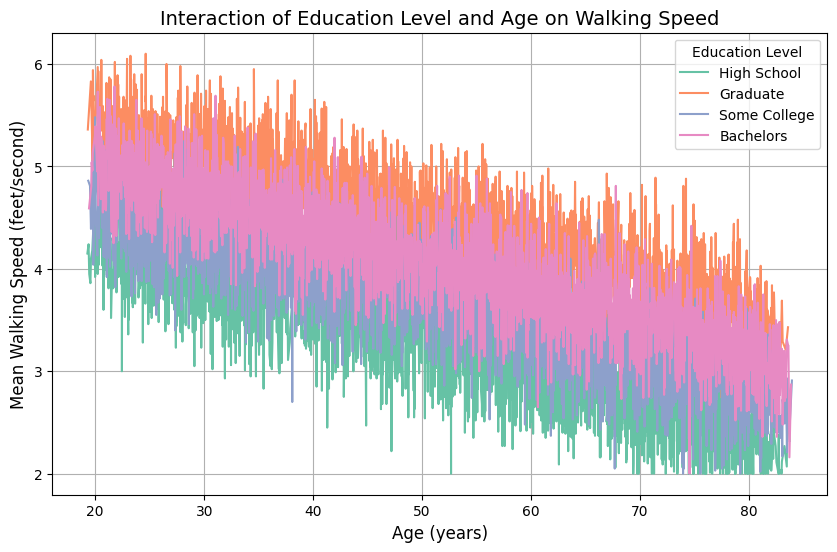

/var/folders/0c/lpwqndbd1wn2y0_gz1l1x3vr0000gn/T/ipykernel_59872/1080570147.py:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='insurance_type', y='visit_cost', data=data, ci='sd')


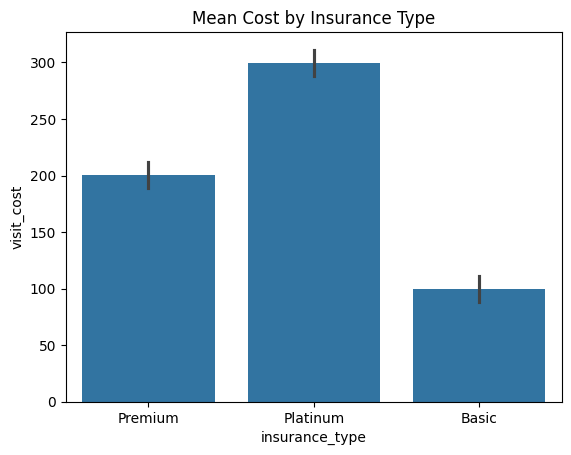

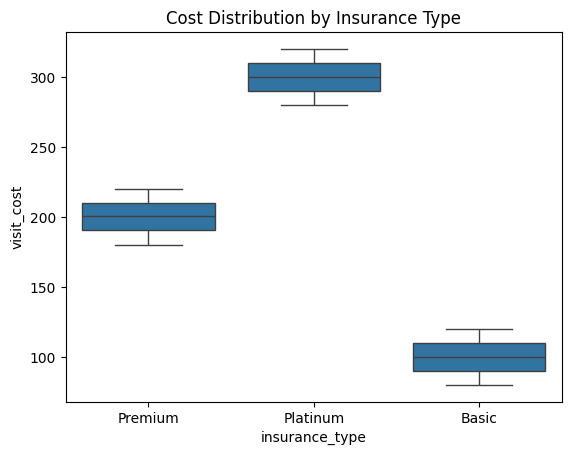

<Figure size 640x480 with 0 Axes>

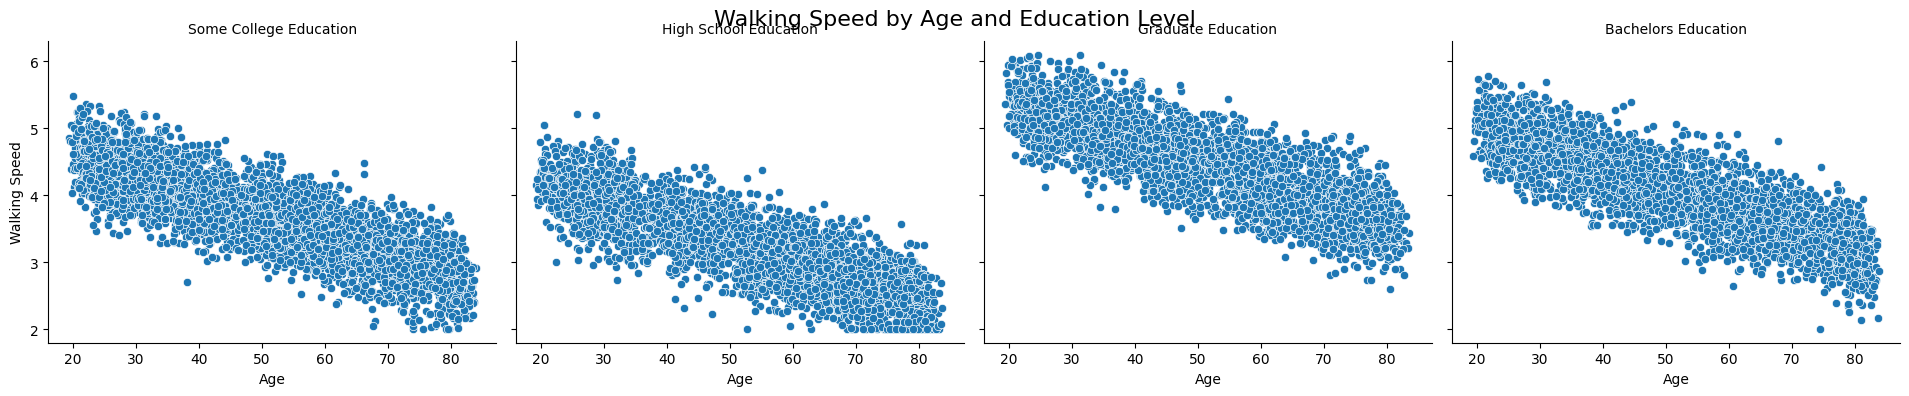

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('ms_data.csv')

# 1. Walking speed analysis
# Scatter plot of age vs walking speed with regression line
plt.figure(figsize=(8, 6))
sns.regplot(
    x='age', 
    y='walking_speed', 
    data=data, 
    scatter_kws={'s': 40, 'color': 'green'},  
    line_kws={'color': 'black', 'linewidth': 2}
)  

plt.title("Scatter Plot of Age vs Walking Speed with Regression Line", fontsize=14)
plt.xlabel("Age (years)", fontsize=12)
plt.ylabel("Walking Speed (feet/second)", fontsize=12)
plt.show()

# Box plots by education level
sns.boxplot(x='education_level', y='walking_speed', data=data)
plt.title('Walking Speed by Education Level')
plt.show()


# line plot showing the interaction between education level and age on walking speed
grouped_data = data.groupby(['age', 'education_level']).walking_speed.mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=grouped_data,
    x='age',
    y='walking_speed',
    hue='education_level',
     palette='Set2'
)

plt.title("Interaction of Education Level and Age on Walking Speed", fontsize=14)
plt.xlabel("Age (years)", fontsize=12)
plt.ylabel("Mean Walking Speed (feet/second)", fontsize=12)
plt.legend(title="Education Level", fontsize=10)
plt.grid(True)
plt.show()

# 2. Cost visualizations
sns.barplot(x='insurance_type', y='visit_cost', data=data, ci='sd')
plt.title('Mean Cost by Insurance Type')
plt.show()

sns.boxplot(x='insurance_type', y='visit_cost', data=data)
plt.title('Cost Distribution by Insurance Type')
plt.show()

# Save plots
plt.savefig("walking_speed_vs_age.png")
plt.savefig("cost_by_insurance.png")

# Faced plots
g = sns.FacetGrid(data, col='education_level', height=4, aspect=1.2)

# Scatter plot for each facet
g.map(sns.scatterplot, 'age', 'walking_speed')

# Add titles and labels
g.set_axis_labels("Age", "Walking Speed")
g.set_titles("{col_name} Education")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Walking Speed by Age and Education Level", fontsize=16)
plt.show()
